In [1]:
import pandas as pd
import os
import xml.etree.ElementTree as ET
import matplotlib.pyplot as plt
import sys
import numpy as np
import ipywidgets as widgets
from ipywidgets import Box, IntSlider
import seaborn as sns

sys.path.append('../scms_py')
from scMSData import scMSData
from analysis import scMSAnalysis
from model import scMSModel


          SPIKE
    Version     : 0.99.30
    Date        : 22-03-2022
    Revision Id : 563
*** zoom3D not loaded ***
plugins loaded:
Fitter,  Linear_prediction,  Peaks,  bcorr,  fastclean,  gaussenh,  rem_ridge,  sane,  sg,  test,  urQRd, 

spike.plugins.report() for a short description of each plugins
spike.plugins.report('module_name') for complete documentation on one plugin
plugins loaded:
FTMS_calib,  PhaseMS,  diagonal_2DMS, 


In [2]:
scms = scMSData()
path = 'vesicle_data'
file_paths = scms.getXMLPath(path)
scms.loadXMLData()

100%|████████████████████████████████████████| 721/721 [00:04<00:00, 160.92it/s]


In [3]:
types = []
for path in file_paths:
    if 'Dense-core Vesicle' in path:
        types.append('DCV')
    else:
        types.append('LV')
metadata = pd.DataFrame({'types':types},index=scms.names)

In [6]:
path = 'vesicle_data'
scms.convertPeak2imzML(path+'/vesicle')

succefully parsed the peak list to imzml!
TODO: convert indices into real world coordinates
loaded spectra
file loaded


In [7]:
scms.getIntensMtxData(ppm=5, feature_n=0.05, mz_range=(400,1100))

number of mass bins 101162


100%|████████████████████████████████| 101162/101162 [00:04<00:00, 21542.01it/s]


In [8]:
sc_data = scMSAnalysis()
sc_data.preprocessing(scms.intens_mtx,norm_method='rms',feat_drop_rate=0.05,cell_drop_rate=0.05)

filtered intensity matrix with shape (717, 2522)


In [23]:
scmodel = scMSModel(sc_data.intens_mtx,metadata)
scmodel.get_labels(['types'])

In [28]:
nn_kwargs = {'layer_shapes':[128,64,1]}
scmodel.train_models(k=3, cv=True, shap=False, model_names=['LR','LDA','SVM','GBT','RF','DNN'],
                     label_name='types',kwargs=nn_kwargs)

performing 3 fold cross validation for LR
cross validation 0...
cross validation 1...
cross validation 2...
performing 3 fold cross validation for LDA
cross validation 0...
cross validation 1...
cross validation 2...
performing 3 fold cross validation for SVM
cross validation 0...
cross validation 1...
cross validation 2...
performing 3 fold cross validation for GBT
cross validation 0...
[21:52:58] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
cross validation 1...
[21:53:00] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the ob

In [29]:
f1 = []
model_names = []
for key in scmodel.test_metrics.keys():
    f1+=[metric['f1'] for metric in scmodel.test_metrics[key]]
    model_names+=[key for metric in scmodel.test_metrics[key]]
cv_df = pd.DataFrame({'f1':f1,'model':model_names})

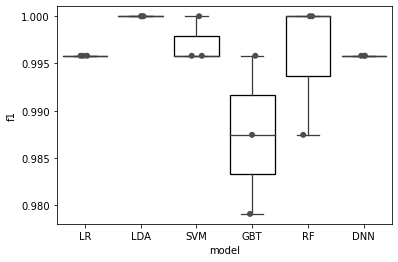

In [32]:
plt.figure()
ax = sns.boxplot(x='model',y='f1',data=cv_df,fliersize=0, whis = 100, linewidth=1.3)
sns.stripplot(x='model',y='f1',data=cv_df,
              size=6, color=".3", linewidth=0)
for i,box in enumerate(ax.artists):
    box.set_edgecolor('black')
    box.set_facecolor('white')
plt.savefig('figures/vesicle_model_cv.pdf')


In [34]:
train_params={'k':3, 'cv':True, 'shap':True, 'model_names':['DNN'], 'label_name':'types',
              'kwargs':nn_kwargs}
scmodel.feature_selection(n_eliminate=10, model_name='DNN',kwargs=train_params, max_feat=310, min_feat=10)

performing 3 fold cross validation for DNN
cross validation 0...
cross validation 1...
cross validation 2...
now testing 300 features..
performing 3 fold cross validation for DNN
cross validation 0...
cross validation 1...
cross validation 2...


/Users/richard/anaconda/envs/scms/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/richard/anaconda/envs/scms/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mo

now testing 290 features..
performing 3 fold cross validation for DNN
cross validation 0...
cross validation 1...
cross validation 2...
now testing 280 features..
performing 3 fold cross validation for DNN
cross validation 0...
cross validation 1...
cross validation 2...
now testing 270 features..
performing 3 fold cross validation for DNN
cross validation 0...
cross validation 1...
cross validation 2...
now testing 260 features..
performing 3 fold cross validation for DNN
cross validation 0...
cross validation 1...
cross validation 2...
now testing 250 features..
performing 3 fold cross validation for DNN
cross validation 0...
cross validation 1...
cross validation 2...
now testing 240 features..
performing 3 fold cross validation for DNN
cross validation 0...
cross validation 1...
cross validation 2...
now testing 230 features..
performing 3 fold cross validation for DNN
cross validation 0...
cross validation 1...
cross validation 2...
now testing 220 features..
performing 3 fold cro

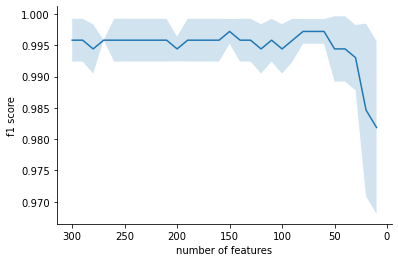

In [37]:
mean_f1 = []
std_f1 = []
for i in range(len(scmodel.feature_retain_metric)-1):
    mean_f1.append(np.mean([metric['f1'] for metric in scmodel.feature_retain_metric[i+1]['DNN']]))
    std_f1.append(np.std([metric['f1'] for metric in scmodel.feature_retain_metric[i+1]['DNN']]))
    
num_feat = [len(feat) for feat in scmodel.feature_retain[1:]]
mean_f1 = np.array(mean_f1)
std_f1 = np.array(std_f1)

fig,axes = plt.subplots(1,1,figsize=(6,4))
#std = np.array([np.std(snr) for snr in SNR])
plt.plot(num_feat,mean_f1)
plt.fill_between(num_feat, mean_f1-std_f1, mean_f1+std_f1,alpha=0.2)
plt.xlabel('number of features')
plt.ylabel('f1 score')
axes.spines['right'].set_visible(False)
axes.spines['top'].set_visible(False)
plt.gca().invert_xaxis()

In [38]:
fig.savefig('figures/feat_select_vesicle.pdf')

Boolean Series key will be reindexed to match DataFrame index.
Boolean Series key will be reindexed to match DataFrame index.


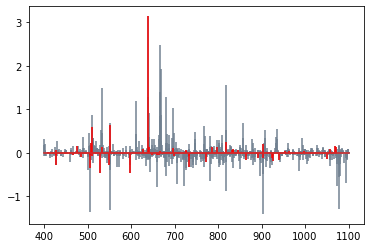

In [41]:
plt.stem(scmodel.intens_mtx.columns.astype(float),
         scmodel.intens_mtx[scmodel.metadata['types']=='DCV'].mean(0)-scmodel.intens_mtx[scmodel.metadata['types']=='LV'].mean(0),
        markerfmt=' ',linefmt='slategray')
plt.stem(scmodel.feature_retain[-6].astype(float),
         scmodel.intens_mtx.loc[:,scmodel.feature_retain[-6]][scmodel.metadata['types']=='DCV'].mean(0)-scmodel.intens_mtx.loc[:,scmodel.feature_retain[-6]][scmodel.metadata['types']=='LV'].mean(0),
        markerfmt=' ',linefmt='r')
plt.savefig('figures/selected_feat_vesicle.pdf')
